In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def Newton(point):
    points = np.array(point)
    n = len(points)
    coef_array = np.zeros(n)
    
    def coef(points):
        if len(points) == 1:
            return points[0, 1]
        return (coef(points[1:]) - coef(points[:-1])) / (points[-1, 0] - points[0, 0])

    for i in range(n):
        coef_array[i] = coef(points[:i+1])
        
    print("coef: ",coef_array)
    
    def f(x):
        y = 0
        for i in range(n):
            x_i = 1
            for k in range(0, i):
                x_i *= (x - points[k, 0])
            y += coef_array[i] * x_i
        return y
    
    return f

coef:  [1.433329   1.98987    3.2589     3.68066667 4.00041667]


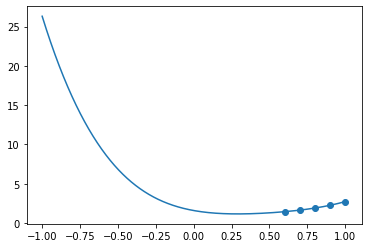

In [5]:
# (a)
points = np.array([(0.6, 1.433329), (0.7, 1.632316), (0.8, 1.896481), (0.9, 2.247908), (1.0, 2.718282)])

p_4 = Newton(points)

x_range = np.linspace(-1, 1, 1000)
y_range = p_4(x_range)
plt.scatter(points[:,0],points[:,1])
plt.plot(x_range, y_range)
plt.show()

In [6]:
# (b)
print("P_4(0.82): %f" % p_4(0.82))
print("P_4(0.98): %f" % p_4(0.98))

P_4(0.82): 1.958910
P_4(0.98): 2.612848


In [7]:
# (c)
# f(x) - p_4(x) = (x - 0.6)*(x - 0.7)*(x - 0.8)*(x - 0.9)*(x - 1)*(f'''''(c)) / 5!
# f'''''(x) = (32*x**5 + 160*x**3 + 120*x)*np.exp(x**2)
def error_bound(x):
    return abs((x - 0.6)*(x - 0.7)*(x - 0.8)*(x - 0.9)*(x - 1)*(32 + 160 + 120)*np.exp(1) / 120)

print("Error bound for x = 0.82:", error_bound(0.82))
print("Error bound for x = 0.98: %8f" % error_bound(0.98))

Error bound for x = 0.82: 5.373586503516332e-05
Error bound for x = 0.98: 0.000217


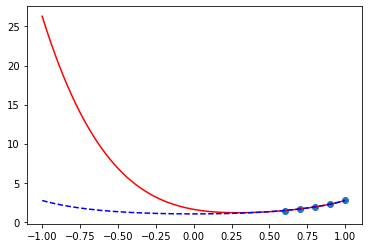

In [19]:
# (d)
def f(x):
    return np.exp(x**2)
x_range2 = np.linspace(-1, 1, 1000)
y_range2 = f(x_range2)
plt.scatter(points[:,0],points[:,1])
plt.plot(x_range, y_range,'r-',x_range2, y_range2,'b--')
plt.show()

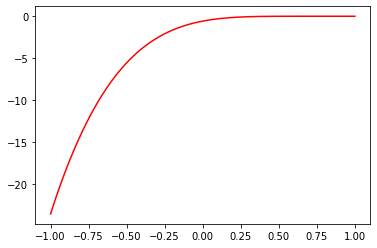

In [21]:
dy_range=f(x_range)-y_range
plt.plot(x_range, dy_range,'r-')

# 自然三次样条插值

In [15]:
def cubic_spline(x_i, y_i, x):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1] # hi
    dy = y_i[1:] - y_i[:-1] #f_(i+1)- f_i
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
    
# 自然样条
    M[0, 0] = 1
    M[-1, -1] = 1
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    for i in range(n-1):
        if x_i[i] <= x and x <= x_i[i+1]:
            return a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3

In [6]:
import numpy as np
n=np.zeros(10)
print(n)
n2=n.reshape(-1,1)
print(n2)
n3=n2.reshape(-1)
print(n3)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 例1

In [16]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
x_i = [0, 1, 2]
y_i = [3,-2,1]
cubic_spline(x_i, y_i, 2.0)

1.0

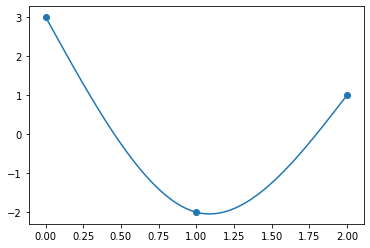

In [18]:
x_i = [0, 1, 2]
y_i = [3,-2,1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
cubic_spline(x_i, y_i, 3.0)
 
y_range = [cubic_spline(x_i, y_i, x) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

# 例1+

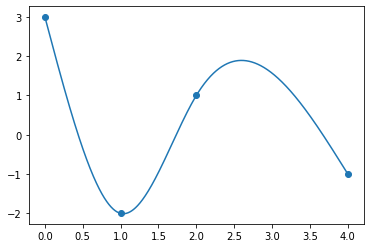

In [19]:
x_i = [0, 1, 2,4]
y_i = [3,-2,1,-1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline(x_i, y_i, x) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

# 曲率调整

In [20]:
def cubic_spline_curve(x_i, y_i, x, v=(0, 0)):
    x_i = np.array(x_i)
    y_i = np.array(y_i)

    dx = x_i[1:] - x_i[:-1]
    dy = y_i[1:] - y_i[:-1]
    n = len(x_i)

    M = np.zeros((n, n))
    N = np.zeros(n)

    for i in range(1, n-1):
        M[i, i-1] = dx[i-1]
        M[i, i] = 2*(dx[i-1] + dx[i])
        M[i, i+1] = dx[i]

        N[i] = 3*(dy[i]/dx[i] - dy[i-1]/dx[i-1])
    

    M[0, 0] = 2
    M[-1, -1] = 2
    N[0] = v[0]
    N[-1] = v[-1]        
    
    N = N.reshape(-1, 1)
    c = np.linalg.inv(M).dot(N).reshape(-1)

    a = y_i[:-1]
    b = dy/dx - dx*(2*c[:-1] + c[1:])/3
    d = (c[1:] - c[:-1])/(3 * dx)
    c = c[:-1]

    for i in range(n-1):
        if x_i[i] <= x and x <= x_i[i+1]:
            return a[i] + b[i]*(x - x_i[i]) + c[i]*(x - x_i[i])**2 + d[i]*(x - x_i[i])**3

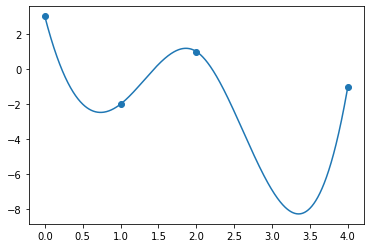

In [22]:
x_i = [0, 1, 2,4]
y_i = [3,-2,1,-1]

x_range = np.linspace(x_i[0], x_i[-1], 1000)
y_range = [cubic_spline_curve(x_i, y_i, x,v=(30, 50)) for x in x_range]
    
plt.scatter(x_i, y_i)
plt.plot(x_range, y_range)
plt.show()

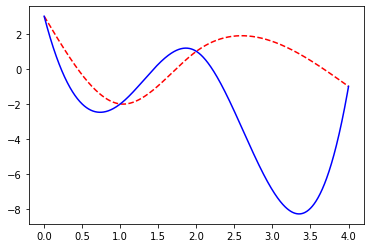

In [23]:
x_range3 = np.linspace(x_i[0], x_i[-1], 1000)
y_range3 = [cubic_spline(x_i, y_i, x) for x in x_range]
    
plt.plot(x_range3, y_range3,'r--',x_range, y_range,'b-')

# 贝塞尔曲线

In [30]:
def bezier(x_i, y_i, t):
    bx = 3*(x_i[1] - x_i[0])
    cx = 3*(x_i[2] - x_i[1]) - bx
    dx = x_i[3] - x_i[0] - bx - cx
    
    by = 3*(y_i[1] - y_i[0])
    cy = 3*(y_i[2] - y_i[1]) - by
    dy = y_i[3] - y_i[0] - by - cy
    
    return (x_i[0] + bx*t + cx*t**2 + dx*t**3, y_i[0] + by*t + cy*t**2 + dy*t**3)

In [31]:
def bezier2(x_i, y_i, t):
    x1,x2,x3,x4=x_i
    y1,y2,y3,y4=y_i
    
    bx = -10*(x1 - x2)
    cx = 10*(x1 - 2*x2 + x3)
    dx = -x1 + 10*x2 - 10*x3 + x4
    
    by = -10*(y1 - y2)
    cy = -((-17*x3*y1 + 17*x4*y1 + 20*x3*y2 - 20*x4*y2 + 7*x1*y3 - 10*x3*y3 + 3*x4*y3 - 7*x1*y4 + 7*x3*y4)/(x3 - x4))
    dy = -((8*x3*y1 - 8*x4*y1 - 10*x3*y2 + 10*x4*y2 - 7*x1*y3 + 10*x3*y3 - 3*x4*y3 + 7*x1*y4 - 8*x3*y4 + x4*y4)/(x3 - x4))
    
    return (x_i[0] + bx*t + cx*t**2 + dx*t**3, y_i[0] + by*t + cy*t**2 + dy*t**3)

In [36]:
def bezier3(x_i, y_i, t):
    x1,x2,x3,x4=x_i
    y1,y2,y3,y4=y_i
    
    bx = -x1 + x2
    cx = x1 - 2*x2 + x3
    dx = -x1 + x2 - x3 + x4
    
    by = -y1 + y2
    cy = -((x3*y1 - x4*y1 + 2*x3*y2 - 2*x4*y2 - 2*x1*y3 - x3*y3 + 3*x4*y3 + 2*x1*y4 - 2*x3*y4)/(x3 - x4))
    dy = -((-(x3*y1) + x4*y1 - x3*y2 + x4*y2 + 2*x1*y3 + x3*y3 - 3*x4*y3 - 2*x1*y4 + x3*y4 + x4*y4)/(x3 - x4))
    
    return (x_i[0] + bx*t + cx*t**2 + dx*t**3, y_i[0] + by*t + cy*t**2 + dy*t**3)

In [38]:
x_i = [1,2,3,2]
y_i = [1,3,3,4]

t_range = np.linspace(0, 1, 1001)
t1 = np.zeros((1001, 2))
t2 = np.zeros((1001, 2))
t3 = np.zeros((1001, 2))

for i in range(1001):
    t1[i] = bezier(x_i, y_i, t_range[i])
    t2[i] = bezier2(x_i, y_i, t_range[i])
    t3[i] = bezier3(x_i, y_i, t_range[i])
t1 = t1.T
t2 = t2.T
t3 = t3.T

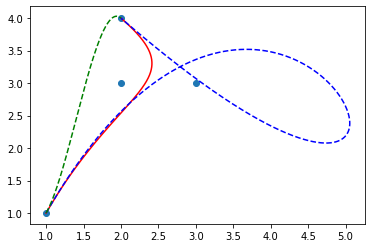

In [39]:
plt.scatter(x_i, y_i)
plt.plot(t1[0],t1[1],'r-')
plt.plot(t2[0],t2[1],'b--')
plt.plot(t3[0],t3[1],'g--')
plt.show()